**B)Linear regression**


**Part 1:Linear regression without scikit-learn (Refer linReg demo)**



a.Load diabetes dataset from sklearn.

In [6]:
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()

# Data description
print(diabetes.DESCR)

# Accessing features and target
X = diabetes.data
y = diabetes.target

# Check the shape of features and target
print("Shape of features:", X.shape)
print("Shape of target:", y.shape)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

b.Preprocessing: Null value handling, standardization

In [7]:
import numpy as np

def handle_null_values(X):
    # Check for NaN values in the feature matrix
    if np.isnan(X).any():
        # Replace NaN values with mean of respective feature
        means = np.nanmean(X, axis=0)
        X[np.isnan(X)] = np.expand_dims(means, axis=0)
    return X

# Standardization
def standardize_features(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)

    # Applying standardization formula to each feature
    X_scaled = (X - means) / stds
    return X_scaled

X_scaled = standardize_features(X)
print(X_scaled)


[[ 0.80050009  1.06548848  1.29708846 ... -0.05449919  0.41853093
  -0.37098854]
 [-0.03956713 -0.93853666 -1.08218016 ... -0.83030083 -1.43658851
  -1.93847913]
 [ 1.79330681  1.06548848  0.93453324 ... -0.05449919  0.06015558
  -0.54515416]
 ...
 [ 0.87686984  1.06548848 -0.33441002 ... -0.23293356 -0.98564884
   0.32567395]
 [-0.9560041  -0.93853666  0.82123474 ...  0.55838411  0.93616291
  -0.54515416]
 [-0.9560041  -0.93853666 -1.53537419 ... -0.83030083 -0.08875225
   0.06442552]]


c.Data splitting: Split data as 70% train and 30% test.

In [8]:
import numpy as np

# Assuming X_scaled is your feature matrix and y is your target vector

# Calculate the number of samples for training set (70%)
train_size = int(0.7 * X_scaled.shape[0])

# Shuffle indices to randomize the data before splitting
indices = np.random.permutation(X_scaled.shape[0])

# Split the indices into training and test sets
train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Split the features and target using the indices
X_train, X_test = X_scaled[train_indices], X_scaled[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Print the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


# train_indices = indices[:train_size]
# This line selects the first train_size number of indices from the shuffled indices. These indices will be used for the training set.

# test_indices = indices[train_size:]
# This line selects the remaining indices starting from train_size until the end of the shuffled indices. These indices will be used for the test set.

Shape of X_train: (309, 10)
Shape of y_train: (309,)
Shape of X_test: (133, 10)
Shape of y_test: (133,)


d.Select a single input feature. Plot input feature against target variable.

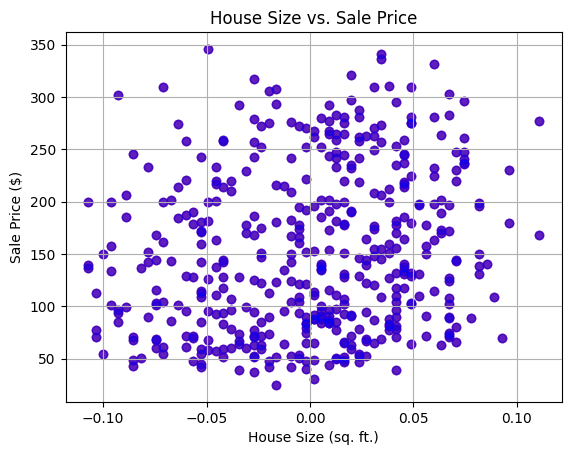

In [9]:
import matplotlib.pyplot as plt

input_feature = X[:, 0]

plt.scatter(input_feature, Y, color='blue', label='Input Feature', alpha=0.5)

plt.scatter(input_feature, Y, color='red', label='Target Variable', alpha=0.5)

plt.scatter(input_feature, Y, color='blue', alpha=0.5)
plt.title('House Size vs. Sale Price')
plt.xlabel('House Size (sq. ft.)')
plt.ylabel('Sale Price ($)')
plt.grid(True)
plt.show()


# import matplotlib.pyplot as plt

# input_feature = X[:, 0]

# # Plot input feature (House Size)
# plt.scatter(input_feature, np.zeros_like(input_feature), color='blue', label='Input Feature', alpha=0.5)

# # Plot target variable (Sale Price)
# plt.scatter(np.zeros_like(Y), Y, color='red', label='Target Variable', alpha=0.5)

# plt.title('House Size vs. Sale Price')
# plt.xlabel('House Size (sq. ft.)')
# plt.ylabel('Sale Price ($)')
# plt.legend()
# plt.grid(True)
# plt.show()

e.Write functions for computing cost, gradients and gradient descent algorithm. (Save cost values of each iteration).

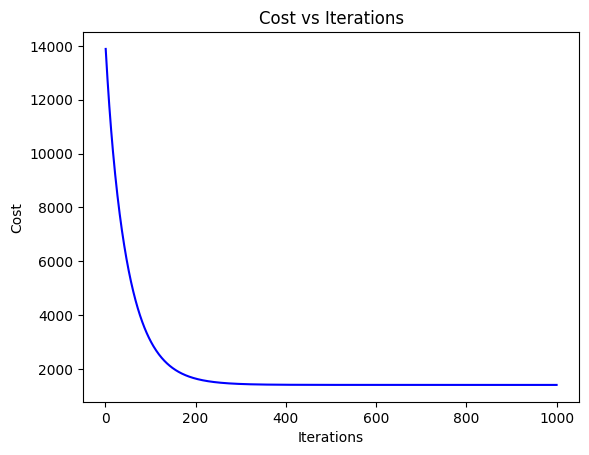

In [10]:
import numpy as np

def compute_cost(X, y, theta):
    """
    Compute the mean squared error cost for linear regression.

    Parameters:
    X : array-like, shape (m, n+1)
        Feature matrix where m is the number of samples and n is the number of features (with intercept added).
    y : array-like, shape (m,)
        Target values.
    theta : array-like, shape (n+1,)
        Parameters (weights) for linear regression including the intercept term.

    Returns:
    cost : float
        The mean squared error cost.
    """
    m = len(y)
    predictions = np.dot(X, theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def compute_gradient(X, y, theta):
    """
    Compute the gradient of the cost function for linear regression.

    Parameters:
    X : array-like, shape (m, n+1)
        Feature matrix where m is the number of samples and n is the number of features (with intercept added).
    y : array-like, shape (m,)
        Target values.
    theta : array-like, shape (n+1,)
        Parameters (weights) for linear regression including the intercept term.

    Returns:
    gradient : array-like, shape (n+1,)
        The gradient of the cost function.
    """
    m = len(y)
    predictions = np.dot(X, theta)
    gradient = (1 / m) * np.dot(X.T, (predictions - y))
    return gradient

def gradient_descent(X, y, theta, learning_rate, iterations):
    """
    Perform gradient descent to learn the parameters (weights) theta for linear regression.

    Parameters:
    X : array-like, shape (m, n+1)
        Feature matrix where m is the number of samples and n is the number of features (with intercept added).
    y : array-like, shape (m,)
        Target values.
    theta : array-like, shape (n+1,)
        Initial parameters (weights) for linear regression including the intercept term.
    learning_rate : float
        The learning rate for gradient descent.
    iterations : int
        The number of iterations to perform gradient descent.

    Returns:
    theta : array-like, shape (n+1,)
        The learned parameters (weights) for linear regression.
    cost_history : list
        The cost values of each iteration.
    """
    m = len(y)
    cost_history = []

    for i in range(iterations):
        # Update parameters
        theta -= learning_rate * compute_gradient(X, y, theta)
        # Compute cost and append to history
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Example usage:
# Initialize parameters
initial_theta = np.zeros(X_train.shape[1] + 1)
X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Perform gradient descent
final_theta, cost_history = gradient_descent(X_train_with_intercept, y_train, initial_theta, learning_rate, iterations)

# Plot cost vs #iterations
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()


**NOTE**
1.The compute_cost function computes the mean squared error cost.
2.The compute_gradient function computes the gradient of the cost function.
3.The gradient_descent function performs gradient descent to learn the parameters (weights) for linear regression.
4.The cost values of each iteration are saved in the cost_history list.




f.Plot regression line on scatter plot of feature vs target.

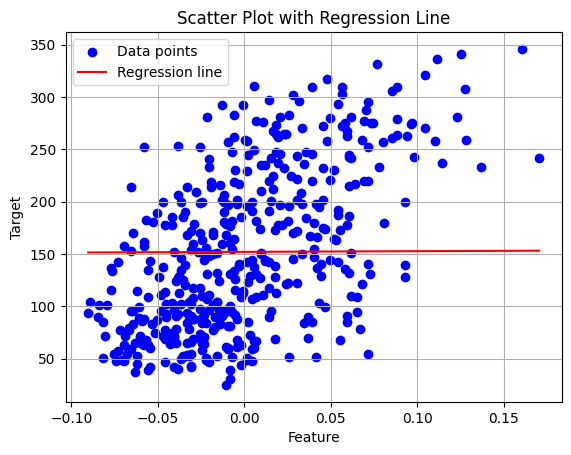

In [11]:

# This line initializes the model parameters theta to zeros. The shape of theta is determined by the number of features in the input data X, plus one additional parameter for the intercept term.
theta = np.zeros(X.shape[1] + 1)  # Initial model parameters (coefficients)


learning_rate = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations for gradient descent

# This line adds a column of ones to the feature matrix X to account for the intercept term in the linear
# regression model. It uses np.ones(X.shape[0]) to create a column vector of ones, and np.c_[] concatenates
# this column vector with the original feature matrix X.
# Add a column of ones to X for the intercept term
X_intercept = np.c_[np.ones(X.shape[0]), X]

# Call the gradient_descent function to optimize the model parameters
optimal_theta, _ = gradient_descent(X_intercept, Y, theta, learning_rate, num_iterations)

# This line plots the scatter plot of the third feature (index 2) of the input data X against the target
# variable Y. It uses plt.scatter to create a scatter plot with blue points and adds a label for the data points.
# Plot the scatter plot of feature versus target
plt.scatter(X[:, 2], Y, color='blue', label='Data points')


# This line plots the regression line on the scatter plot. It first generates 100 evenly spaced x_values between
# the minimum and maximum values of the third feature.
# Then, it computes the corresponding y_values using the optimized model parameters optimal_theta and
# the equation of the regression line (y = theta[0] + theta[1] * x). Finally, it uses plt.plot
# to draw the regression line with red color and adds a label.
# Plot the regression line
x_values = np.linspace(min(X[:, 2]), max(X[:, 2]), 100)
y_values = optimal_theta[0] + optimal_theta[1] * x_values
plt.plot(x_values, y_values, color='red', label='Regression line')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.grid(True)
plt.show()


g.Plot cost vs #iterations.

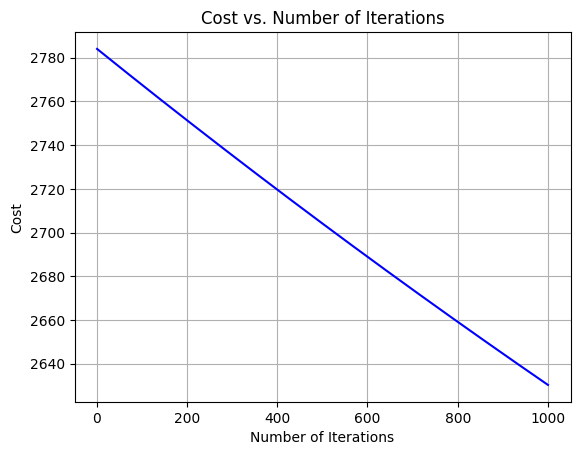

In [12]:
# Call the gradient_descent function to optimize the model parameters
optimal_theta, cost_history = gradient_descent(X_intercept, Y, theta, learning_rate, num_iterations)

# Plot cost vs. number of iterations
plt.plot(range(1, num_iterations + 1), cost_history, color='blue')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Iterations')
plt.grid(True)
plt.show()

h.Report parameter values, training error, test error and model accuracy.

In [13]:
# This line computes the training error (mean squared error) by calling the compute_cost function. It calculates the cost using the feature matrix with the intercept term added (X_intercept), the actual training labels (Y), and the optimized parameter values (optimal_theta). The computed training error is stored in the variable training_cost.

# Training error
training_cost = compute_cost(X_intercept, Y, optimal_theta)

# Test error
X_test_intercept = np.c_[np.ones(X_test.shape[0]), X_test]  # Add intercept term to test data
test_cost = compute_cost(X_test_intercept, y_test, optimal_theta)


# Report parameter values, training error, test error
print("Optimal Parameters (theta):", optimal_theta)
print("Training Error (MSE):", training_cost)
print("Test Error (MSE):", test_cost)


Optimal Parameters (theta): [152.13348388  12.31375271   2.03599146  40.41147632  30.17062865
  13.51557535  10.7403564  -26.74326721  28.61857515  38.59814693
  25.6450131 ]
Training Error (MSE): 2630.2315389360997
Test Error (MSE): 6844.613871416834


**Part 2: Linear regression with scikit-learn**

a.	Download dataset as per your batch.

In [ ]:
import pandas as pd
df = pd.read_excel('AirQualityUCI.xlsx')
print(df.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')


b.Preprocessing: Null value handling, standardization, replace categorical values with numeric values (e.g. 0, 1, 2 etc.)

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

columns_to_preprocess = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
                         'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
                         'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

# Null value handling with SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[columns_to_preprocess] = imputer.fit_transform(df[columns_to_preprocess])

# Standardization with StandardScaler
scaler = StandardScaler()
df[columns_to_preprocess] = scaler.fit_transform(df[columns_to_preprocess])

# Replace categorical values with numeric values with OrdinalEncoder
encoder = OrdinalEncoder()
df['Time'] = encoder.fit_transform(df[['Time']])

# print("\nPreprocessed Data:")
# print(df)


c.	Data splitting: Split data as 70% train and 30% test using train_test_split function.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Time'])
y = df['Time']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6549, 14)
X_test shape: (2808, 14)
y_train shape: (6549,)
y_test shape: (2808,)


d.	Feature selection: Dimensionality reduction / select manually



In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('AirQualityUCI.xlsx')

# Select features for PCA (excluding 'Date' and 'Time' columns)
selected_features = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
                     'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
                     'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

# Separate features (X) and target variable (if applicable)
X = df[selected_features]

# Dimensionality Reduction (PCA)
pca = PCA(n_components=5)  # Specify the number of components to keep
X_reduced = pca.fit_transform(X)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Optionally, you can also access the principal components
print("Principal components:")
print(pca.components_)


Explained variance ratio: [0.67362722 0.18006405 0.06642539 0.03429538 0.02226658]
Principal components:
[[-0.00394804 -0.41307241 -0.02647121 -0.04213366 -0.43722955 -0.10874108
   0.01996115 -0.02914011 -0.55236748 -0.55951798 -0.03861194 -0.04269093
  -0.03397241]
 [ 0.06336668 -0.07288563 -0.02691917 -0.05005626  0.02114643  0.48341299
  -0.70614525  0.17797962 -0.36158019  0.28345019 -0.06568345 -0.06616319
  -0.0566816 ]
 [ 0.14061008  0.18843323  0.00767071  0.04859504 -0.01786066  0.50407522
   0.65214334  0.27254621 -0.39256973  0.15709985  0.03822083  0.07257907
   0.05289881]
 [-0.18740921  0.15939688 -0.172246    0.02200089 -0.01264792 -0.46068203
   0.04417242 -0.35762064 -0.53244194  0.52985382  0.00685853  0.04691256
   0.02446952]
 [ 0.0528951   0.1264616   0.96088324 -0.02901237 -0.10431927 -0.14465022
  -0.03815238  0.03003807 -0.10904852  0.08464401 -0.04388464 -0.03208941
  -0.02992297]]


e.	Fit model using fit function.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('AirQualityUCI.xlsx')

# Choose 'T' column as the target variable
target_column = 'T'

# Drop 'Date' and 'Time' columns as they are not used for modeling
X = df.drop(columns=['Date', 'Time', target_column])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Now the model is fitted to the training data and can be used for predictions or evaluation


LinearRegression()

f.	Report parameter values, training error and test error and model accuracy.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, y_train, X_test, y_test are already defined

# 1. Fit the model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# 2. Calculate the training error (mean squared error)
y_train_pred = model.predict(X_train)
train_error = mean_squared_error(y_train, y_train_pred)

# 3. Calculate the test error (mean squared error)
y_test_pred = model.predict(X_test)
test_error = mean_squared_error(y_test, y_test_pred)

# 4. Calculate the coefficient of determination (R^2 score) as model accuracy
accuracy = r2_score(y_test, y_test_pred)

# Report parameter values
print("Parameter values (coefficients):")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Report training and test errors
print("\nTraining Error (MSE):", train_error)
print("Test Error (MSE):", test_error)

# Report model accuracy
print("\nModel Accuracy (R^2 Score):", accuracy)


Parameter values (coefficients):
Intercept: 11.916321736596242
Coefficients: [ 1.36148997e-03 -1.68522707e-03 -8.38760748e-03 -7.46065193e-01
  7.09000339e-04  6.59920145e-03 -6.60509909e-03 -1.10548101e-02
  2.49657130e-02 -4.00429314e-03 -3.15996581e-01  2.11947309e+00]

Training Error (MSE): 9.498621873446048
Test Error (MSE): 9.700703745979423

Model Accuracy (R^2 Score): 0.9948183521251963
